### Full Name : Pantea Amoie
### Student Number : 400101656


# Support Vector Machines (SVM)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [ ]:
df = pd.read_csv("Liver_Disease.csv")

### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

Shape of the dataset: (583, 11)
Number of missing entries in each column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64
Counts of 'in danger' labels : 416 and 'not in danger' labels: 167


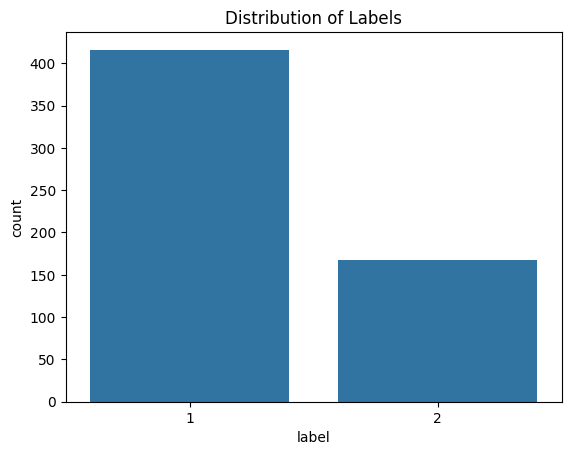

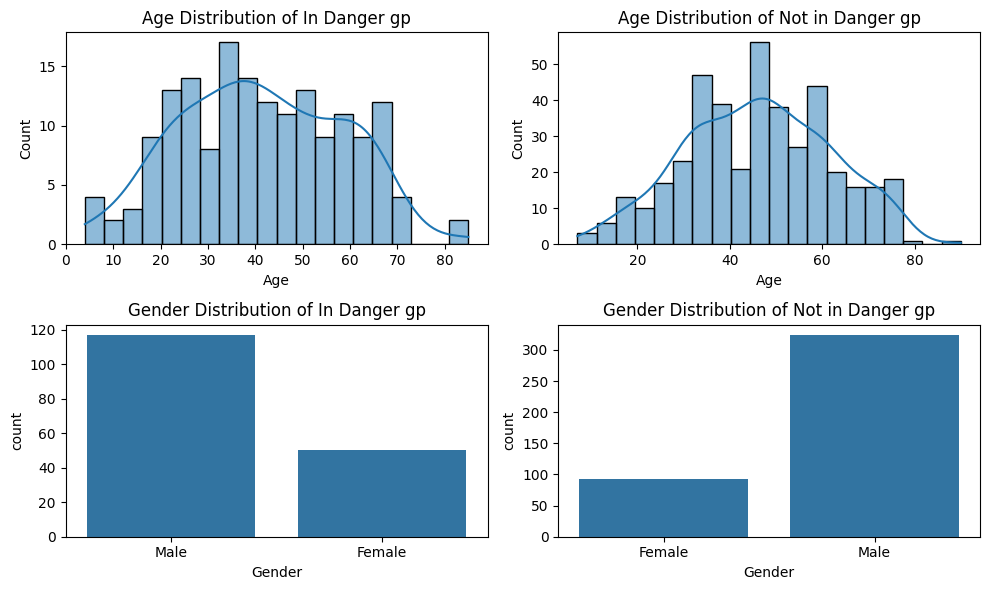

In [ ]:
# Find the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Check if there is missing entries in the dataset columnwise
missing_entries = df.isnull().sum()
print("Number of missing entries in each column:")
print(missing_entries)
# As we can see, there are 4 missing entries in Albumin_and_Globulin_Ratio column


# Check whether the dataset is balanced or not
one_mask = df['label'] == 1
two_mask = df['label'] == 2
label_one = df[one_mask]
label_two = df[two_mask]
print(f"Counts of 'in danger' labels : {len(label_one)} and 'not in danger' labels: {len(label_two)}")

sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()
# We can see that the dataset is not balanced
# The ratio between the two classes is about 2.5:1, which indicates that
# the "in danger" class is much more frequent than the "not in danger" class.

# Plot the age distirbution and gender distrbution for both group of patients(4 plots)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(df[df['label'] == 2]['Age'], kde=True, bins=20)
plt.title('Age Distribution of In Danger gp')

plt.subplot(2, 2, 2)
sns.histplot(df[df['label'] == 1]['Age'], kde=True, bins=20)
plt.title('Age Distribution of Not in Danger gp')

plt.subplot(2, 2, 3)
sns.countplot(x='Gender', data=df[df['label'] == 2])
plt.title('Gender Distribution of In Danger gp')

plt.subplot(2, 2, 4)
sns.countplot(x='Gender', data=df[df['label'] == 1])
plt.title('Gender Distribution of Not in Danger gp')

plt.tight_layout()
plt.show()


##### Question: What do you conclude from the plots?

The first bar chart shows that the dataset is not balanced. There are significantly more instances labeled "1" (representing the "not in danger" group) compared to label "2" (the "in danger" group). This can cause issues in model performance, especially in classification, as the model may become biased toward predicting the majority class.
The ratio is about 2.5:1, with around 400 instances of label 1 and around 150 instances of label 2.\
The age distribution for both "In Danger" and "Not in Danger" groups shows a somewhat normal distribution, though they have differences in age peaks and spread.\
The distribution of "In Danger" has its most patients falling in the 30-40 age range. The spread of ages is quite large, with patients ranging from young children (age 10) to older adults (around 80).
There is a noticeable peak in the 30-40 age range, indicating a concentration of patients in this age group who are considered "In Danger."\
This distribution of "Not In Danger" is slightly more evenly spread compared to the "In Danger" group.
The peak is again around the 30-40 age range, but the overall distribution suggests that patients across a broader age range are more evenly distributed.\
The tail of the distribution indicates that older patients (up to 80) are also part of the "In Danger" group, but in smaller numbers compared to the peak.\
In the "Not In Danger" group, there is a significant gender imbalance with many more males than females. The number of males is more than 3 times the number of females.\
In the "In Danger" group, the gender imbalance is a bit less significant, but the males are still more than females. Therefore we can conclude that males make up a significantly higher proportion of both the "in danger" and "not in danger" groups.\
Males appear to be more frequently labeled as "In Danger" and "Not in Danger," but the male dominance is more pronounced in the "In Danger" group. This could imply that certain health risks or conditions disproportionately affect males.


#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [ ]:
from scipy import stats
# We first used IQR method to detect the outliers but that method would remove a high percentage
# of the data as outliers, therefore we try using z sore method now
# Data points with a Z-score that exceeds a chosen threshold are considered outliers

print(f"Shape of the dataset before outlier removal: {df.shape}")
df_clean = df.copy()
numerical_columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
                     'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                     'Aspartate_Aminotransferase', 'Total_Protiens',
                     'Albumin', 'Albumin_and_Globulin_Ratio']

# Threshold for Z-score
threshold = 3

for column in numerical_columns:
    z_scores = stats.zscore(df_clean[column])
    outliers = (z_scores < -threshold) | (z_scores > threshold)
    df_clean = df_clean[~outliers]

df_clean = df_clean.reset_index(drop=True)
print(f"Shape of the dataset after outlier removal: {df_clean.shape}")


Shape of the dataset before outlier removal: (583, 11)
Shape of the dataset after outlier removal: (509, 11)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [ ]:
# To normalize numerical features to be between 0 and 1, we need to use min max scaling

for column in numerical_columns:
    column_min = df_clean[column].min()
    column_max = df_clean[column].max()
    df_clean[column] = (df_clean[column] - column_min) / (column_max - column_min)

df_clean.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.709302,Female,0.021277,0.000000,0.139797,0.016129,0.020202,0.533333,0.521739,0.240,1
1,0.674419,Male,0.744681,0.857143,0.717024,0.145161,0.227273,0.650000,0.500000,0.176,1
2,0.674419,Male,0.489362,0.634921,0.481398,0.134409,0.146465,0.566667,0.521739,0.236,1
3,0.627907,Male,0.042553,0.047619,0.134160,0.010753,0.025253,0.533333,0.543478,0.280,1
4,0.790698,Male,0.248227,0.301587,0.148816,0.045699,0.123737,0.616667,0.326087,0.040,1


In [ ]:
# We should also handle missing values
# As we saw before, there are 4 missing values in Albumin_and_Globulin_Ratio column
# We try to impute them with the mean of the column

mean_value = df_clean['Albumin_and_Globulin_Ratio'].mean()
df_clean['Albumin_and_Globulin_Ratio'].fillna(mean_value, inplace=True)

missing_entries = df_clean.isnull().sum()
print("Number of missing entries in each column after imputation:")
print(missing_entries)

# We should also encode the categorical column (gender)
# One-hot encoding
df_clean = pd.get_dummies(df_clean, columns=['Gender'], drop_first=True)
df_clean.head()


Number of missing entries in each column after imputation:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
label                         0
dtype: int64


<ipython-input-6-cfd5d0c19d37>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Albumin_and_Globulin_Ratio'].fillna(mean_value, inplace=True)


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label,Gender_Male
0,0.709302,0.021277,0.000000,0.139797,0.016129,0.020202,0.533333,0.521739,0.240,1,False
1,0.674419,0.744681,0.857143,0.717024,0.145161,0.227273,0.650000,0.500000,0.176,1,True
2,0.674419,0.489362,0.634921,0.481398,0.134409,0.146465,0.566667,0.521739,0.236,1,True
3,0.627907,0.042553,0.047619,0.134160,0.010753,0.025253,0.533333,0.543478,0.280,1,True
4,0.790698,0.248227,0.301587,0.148816,0.045699,0.123737,0.616667,0.326087,0.040,1,True


### SVM

#### spliting data

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into test and training sets
X = df_clean.drop(columns='label')
y = df_clean['label']

# 80% train, 20% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ***The next part has asked us to use the validation set for grid search
# So, we split the data to train, test and validation sets

# 70% train, 15% validation, 15% test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1765, random_state=42)

### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [ ]:
from sklearn.metrics import accuracy_score

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_val = svm_model.predict(X_val)
y_pred_test = svm_model.predict(X_test)
accuracy_default_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of the default SVM model on test set: {accuracy_default_test:.4f}")

Accuracy of the default SVM model on test set: 0.6623


#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C': [0.1, 1, 10, 100],  'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1] }

# Choosing cv = 5 -> 5-fold cross validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
best_score = grid_search.best_score_
print(f"Best cross-validation score: {best_score:.4f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.6930


Train an svm model on the entire training data using the parameters you found in the previous step.

In [ ]:
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)
y_predicted_test = best_svm_model.predict(X_test)
y_predicted_val = best_svm_model.predict(X_val)

best_accuracy_test = accuracy_score(y_test, y_predicted_test)
print(f"Accuracy on test set with best parameters: {best_accuracy_test:.4f}")

# best_accuracy_val = accuracy_score(y_val, y_predicted_val)
# print(f"Accuracy on validation set with best parameters: {best_accuracy_val:.4f}")


Accuracy on test set with best parameters: 0.6623


### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

Accuracy on test set: 0.6623


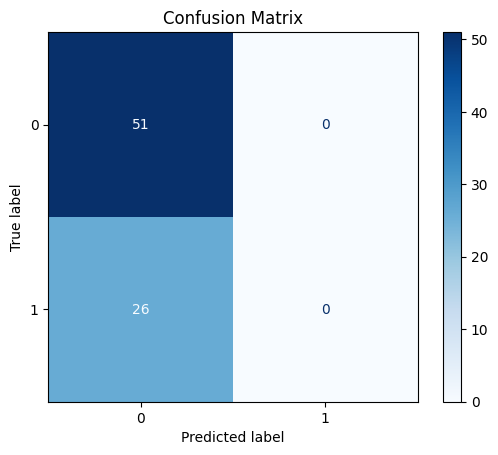

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_predicted_test)
print(f"Accuracy on test set: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_predicted_test)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

True Positive = 51 : The number of correctly predicted instances where we have predicted that the patient is in danger and we were right. \
False Negative = 0 : The number of incorrectly predicted instances where we have predicted that the patient is not in danger but they actually were in danger.\
False Positive = 26 :  The number of incorrectly predicted instances where we have predicted that the patient is in danger but they actually were not in danger.\
True Negative = 0 : The number of correctly predicted instances where we have predicted that the patient is not in danger and we were right.

Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

SVM Accuracy with outliers: 0.6373
Logistic Regression Accuracy with outliers: 0.6275


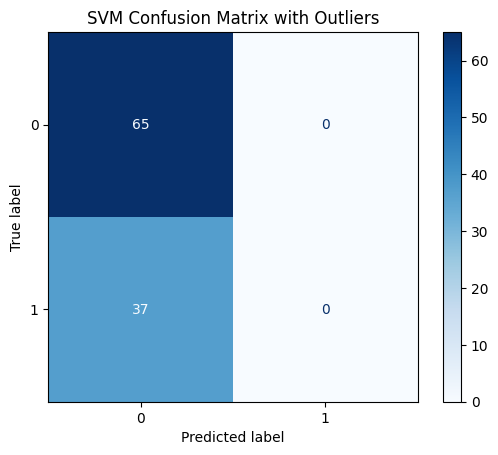

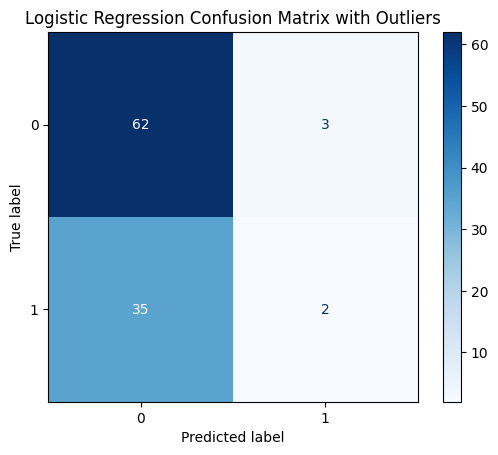

In [ ]:
from sklearn.linear_model import LogisticRegression

# I add 10 outliers to 'Direct_Bilirubin' column and 10 outliers to Albumin as an example
df_clean = df_clean.reset_index(drop=True)

np.random.seed(42)
random_indices = np.random.randint(0, df_clean.shape[0], size=10)
df_clean.loc[random_indices, 'Direct_Bilirubin'] *= np.random.randint(10, 100)
random_indices = np.random.randint(0, df_clean.shape[0], size=10)
df_clean.loc[random_indices, 'Albumin'] *= np.random.randint(10, 100)

X = df_clean[numerical_columns]
y = df_clean['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the svm model
svm_model_with_outliers = SVC(C=1.0, kernel='rbf', gamma=0.1)
svm_model_with_outliers.fit(X_train, y_train)

# Training the logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_train, y_train)

# Predictions for the svm model
svm_predictions = svm_model_with_outliers.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Predictions for the logisic regression model
logistic_reg_predictions = logistic_reg_model.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)

print(f"SVM Accuracy with outliers: {svm_accuracy:.4f}")
print(f"Logistic Regression Accuracy with outliers: {logistic_reg_accuracy:.4f}")

# Confusion matrix for svm
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix).plot(cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix with Outliers')
plt.show()

# Confusion matrix for logistic regression
logistic_reg_confusion_matrix = confusion_matrix(y_test, logistic_reg_predictions)
ConfusionMatrixDisplay(confusion_matrix=logistic_reg_confusion_matrix).plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix with Outliers')
plt.show()


Both models showed a similar level of accuracy when outliers were present, but the SVM slightly outperformed Logistic Regression with an accuracy of 63.73% compared to Logistic Regression’s 62.75%. However, neither model performed exceptionally well, indicating that outliers negatively affected the model's ability to predict correctly.

**SVM with outliers:**\
True Positives (TP): 65 instances where the SVM correctly predicted danger.\
False Negatives (FN): 0, meaning SVM successfully predicted all actual danger cases, which is a good sign in a high-risk medical prediction scenario.\
False Positives (FP): 37 cases where SVM falsely predicted danger.\
True Negatives (TN): 0 cases where it correctly predicted safety, meaning SVM completely failed to identify any truly safe cases.

**LR with outliers:**\
True Positives (TP): 62 instances where Logistic Regression correctly predicted danger.\
False Negatives (FN): 3 cases where it failed to detect actual danger (patients who were in danger but not predicted as such).\
False Positives (FP): 35 cases where it falsely predicted danger.\
True Negatives (TN): 2 cases where it correctly predicted safety, which is slightly better than SVM in detecting safe patients but still very poor overall.

Both models are fairly good at identifying true positives (patients in danger) even in the presence of outliers, which is crucial in a medical setting. However:\
SVM has zero false negatives (FN), meaning it does not miss any cases of patients who are actually in danger. This is significant in applications where missing positive cases (i.e., actual danger) could lead to severe consequences.
Logistic Regression, however, has a slight compromise in its recall with 3 false negatives, indicating it missed a few patients who were actually in danger.

SVM has a higher rate of false positives (37 cases) and zero true negatives. This indicates that while the model is aggressive in identifying patients as being in danger, it also has a tendency to misclassify safe patients as being in danger, leading to a higher false alarm rate.\
Logistic Regression has a slightly lower false positive rate (35 cases) and managed to correctly identify 2 patients as not in danger. This could mean that the logistic regression model might be better suited to balance the classifications in some cases, especially if the focus is also on not over-diagnosing non-danger cases.

SVM is likely more suitable if the priority is to capture all cases of patients in danger with the trade-off of a higher false positive rate. This approach minimizes missed cases, which can be critical in medical diagnostics.\
Logistic Regression might be more useful if there’s a need to balance between correctly predicting danger and not falsely alarming safe cases. However, its sensitivity to outliers and the presence of a few false negatives can be a drawback.